## Duplicate Dataset Analysis Template

Authors: Sarah Perry, Daniel Perry

Write intro stuff here

In [26]:
import dupedat.simulated_dataset_gen.create_simulated_datasets as csd
import dupedat.simulated_dataset_gen.example_simulated_datasets as esd
import dupedat.method as methods
import pandas as pd
import matplotlib.pyplot as plt

# Table of Contents
- [Import dataset](#Import-dataset)
- Remove extreme outliers
- Check Assumptions
- Get outliers

## Import dataset


- Instuctions for import
- Specify structure of dataset
- Show head of dataset so they can check
- Custom error for incorrect formatting
- Instructions on how to import pre build data set

In [27]:
# Use to load your own data
fp_df = input('\nInput data filepath\n\n')



Input data filepath

h


In [28]:
dataset = esd.test_wrapper.abs_rel(True)
dataset["hi"] = dataset["true_value"]*2
dataset

,replicate_1,replicate_2,true_value,hi
0,50.099112,59.780147,52.933054,105.866109
1,19.278411,22.223512,21.559504,43.119009
2,32.572303,28.467168,30.956980,61.913959
3,66.662163,62.496591,62.926082,125.852163
4,73.449557,102.262080,75.935179,151.870357
5,71.520715,53.532616,61.277794,122.555588
6,61.870407,59.705939,65.683764,131.367529
7,23.586029,27.934807,23.171127,46.342254
8,2.037706,-9.714287,0.094174,0.188348
9,6.869493,5.640868,7.258533,14.517066


## Remove extreme outliers

In [29]:
duplicate_dataset = methods.duplicate_datasets.DuplicateDataset(dataset, 'replicate_1', 'replicate_2')
duplicate_dataset.create_dif_mean_plot()


Code to remove points in a list

<class 'dupedat.method.sd_models.RCSMethod'>


/Users/danielperry/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning:

Maximum number of iterations (1000) reached.

/Users/danielperry/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning:

Maximum number of iterations (1000) reached.



ModelParams(model_type=<ModelType.ABSOLUTE_RELATIVE: 3>, absolute_error_sd=absolute_error_sd, 2.923717486653807, ConfidenceInterval(lower_bound=2.5854709101602733, upper_bound=3.738932780822335, p_value=0.95), relative_error_sd=relative_error_sd, 0.0755218258290057, ConfidenceInterval(lower_bound=0.0590609365850082, upper_bound=0.08406771504010911, p_value=0.95))
~*~*~*~*~*~**~*~*~*~*~*~*~


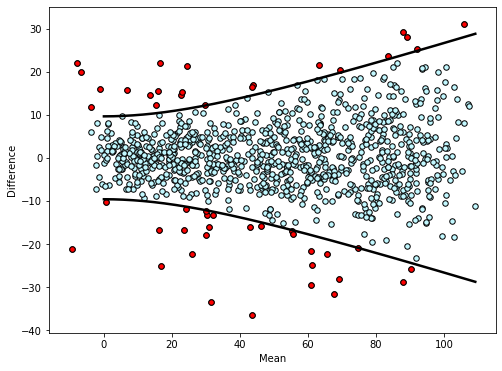

In [30]:
vm_list = [methods.sd_models.RCSMethod] # CSMethod, RCSMethod, RZMethod, ZMethod]  # HNMethod, RZMethod, SDMethod



for method in vm_list:
    print(method)
    vm = method(duplicate_dataset, 0.95)
    print(vm.get_gaussian_sd_params())
    print('~*~*~*~*~*~**~*~*~*~*~*~*~')

    sdt_outlier = methods.outlier_detection.SDTMethod(vm)
    fig_outlier = sdt_outlier.display_outliers()

    plt.show(block=fig_outlier)

In [31]:
duplicate_dataset.dataframe

,replicate_1,replicate_2,true_value,hi,dif,mean,abs_dif,squared_dif,squared_mean,scaled_dif,outlier
0,50.099112,59.780147,52.933054,105.866109,-9.681035,54.939629,9.681035,93.722432,3018.362870,-1.907302,False
1,19.278411,22.223512,21.559504,43.119009,-2.945101,20.750962,2.945101,8.673623,430.602408,-0.887817,False
2,32.572303,28.467168,30.956980,61.913959,4.105135,30.519736,4.105135,16.852134,931.454282,1.102642,False
3,66.662163,62.496591,62.926082,125.852163,4.165572,64.579377,4.165572,17.351991,4170.495960,0.732555,False
4,73.449557,102.262080,75.935179,151.870357,-28.812523,87.855819,28.812523,830.161475,7718.644872,-3.973791,True
5,71.520715,53.532616,61.277794,122.555588,17.988099,62.526665,17.988099,323.571704,3909.583845,3.238780,False
6,61.870407,59.705939,65.683764,131.367529,2.164467,60.788173,2.164467,4.684919,3695.201965,0.397677,False
7,23.586029,27.934807,23.171127,46.342254,-4.348779,25.760418,4.348779,18.911875,663.599146,-1.238320,False
8,2.037706,-9.714287,0.094174,0.188348,11.751993,-3.838291,11.751993,138.109346,14.732476,3.999927,True
9,6.869493,5.640868,7.258533,14.517066,1.228625,6.255180,1.228625,1.509519,39.127283,0.414847,False
